In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.basemap import Basemap

Import our dataframe from the previous deliverable

In [2]:
df = pd.read_csv('data/df5.csv', sep=';', header=0)

In [3]:
def great_circle_distance(location_a, location_b):
    delta_lat = (location_b[0]-location_a[0]) * np.pi/180
    delta_lon = (location_b[1]-location_a[1]) * np.pi/180
    R = 6371 # mean Earth radius in km
    a = (np.sin(delta_lat/2))**2 + (np.cos(location_a[0]*(np.pi/180)) * np.cos(location_b[0]*(np.pi/180)) * (np.sin(delta_lon/2))**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

Split the dataframe into US and non-US dataframes.

In [4]:
df_US = df[(df.countrycode=='US')]
df_US.reset_index(drop=True, inplace=True)
df_US

,headline,city,latitude,longitude,countrycode,cluster_index
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,0
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,0
3,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,0
4,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,0
...,...,...,...,...,...,...
302,Dengue Outbreak in Easton,Easton,40.68843,-75.22073,US,0
303,Authorities are Worried about the Spread of Va...,Clovis,36.82523,-119.70292,US,0
304,More Zika patients reported in Fort Worth,Fort Worth,32.72541,-97.32085,US,0
305,Zika symptoms spotted in Boynton Beach,Boynton Beach,26.52535,-80.06643,US,0


In [5]:
df_world = df[df['countrycode']!='US']
df_world.reset_index(drop=True, inplace=True)
df_world

,headline,city,latitude,longitude,countrycode,cluster_index
0,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR,1
1,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO,-1
2,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH,2
3,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR,3
4,San Juan reports 1st U.S. Zika-related death a...,San Juan,-31.53750,-68.53639,AR,-1
...,...,...,...,...,...,...
300,Influenza Exposure in Muscat,Muscat,23.58413,58.40778,OM,-1
301,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,31.76904,35.21633,IL,17
302,More Zika patients reported in Indang,Indang,14.19528,120.87694,PH,4
303,Suva authorities confirmed the spread of Rotav...,Suva,-18.14161,178.44149,FJ,13


Plotting the data using latitude and longitude gives us a quick visual of how the data clusters.  Based on the 'visualize_clusters' from the previous section, we see that our parameters specific to the US data may need to be fine tuned

In [6]:
def visualize_clusters(epsilon, min_points, df):
    locations = np.array(list(zip(df['longitude'], df['latitude'])))
    dbscan_model = DBSCAN(eps=epsilon, min_samples=min_points, metric=great_circle_distance)
    clusters = dbscan_model.fit_predict(locations)
    print(f"Number of Outliers: {(clusters == -1).sum()}")
    print(f"Number of groups: {max(clusters)+1}")
    print(f"Number of headlines: {len(clusters)}")
    c = np.array(clusters)
    plt.scatter(df['longitude'],df['latitude'], c=c, cmap='nipy_spectral')
    plt.show()
    #df.drop(['cluster_index'], axis=1)
    df.loc[:, 'cluster_index'] = clusters
    return df

Number of Outliers: 22
Number of groups: 10
Number of headlines: 307


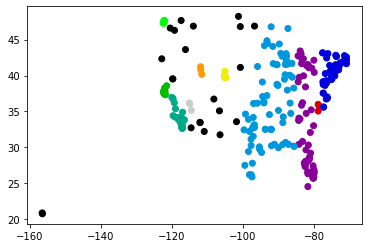

/home/chris/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,headline,city,latitude,longitude,countrycode,cluster_index
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,1
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,0
3,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,2
4,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,2
...,...,...,...,...,...,...
302,Dengue Outbreak in Easton,Easton,40.68843,-75.22073,US,1
303,Authorities are Worried about the Spread of Va...,Clovis,36.82523,-119.70292,US,3
304,More Zika patients reported in Fort Worth,Fort Worth,32.72541,-97.32085,US,2
305,Zika symptoms spotted in Boynton Beach,Boynton Beach,26.52535,-80.06643,US,0


In [7]:
visualize_clusters(100, 3, df_US)

Now that we have clustered the US data individually, we can perform some summary statistics about the sample.
We can count how many headlines belong to each cluster using the 'groupby' method of pandas.
We can also take a mean average of the [lat|long]itude of each cluster.
*For a more accurate geographic center, the great circle formula could be added to the aggregate list with a custom formula. See addition below

In [8]:
#US_group order by cluster size and add aggregate info
def order_clusters(df):
    df_cluster_order = df.groupby('cluster_index').agg(
        #cluster_index=('cluster_index', max),
        cluster_count=('cluster_index', 'count'),
        mean_lon=('longitude', 'mean'),
        mean_lat=('latitude', 'mean')
    ).sort_values('cluster_count', ascending=False).reset_index()
    
    
    return df_cluster_order

In [9]:
aggregate = order_clusters(df_US)
aggregate

,cluster_index,cluster_count,mean_lon,mean_lat
0,2,81,-92.409498,35.741936
1,1,69,-74.909526,40.323022
2,0,66,-81.755993,31.991700
3,3,34,-117.944434,34.123855
4,-1,22,-115.246236,38.462043
5,4,15,-122.072558,37.780540
6,6,7,-105.080220,39.904549
7,5,4,-122.283178,47.478502
8,7,3,-111.825210,40.716337
9,8,3,-78.805197,35.606263


In [10]:
for col in aggregate.columns:
    print(col)

cluster_index
cluster_count
mean_lon
mean_lat


We now have a list with the biggest clusters first.  We can use padas 'Catagoricals' to use the cluster_index order as our headlines sort_values order.

In [11]:
sorter=aggregate['cluster_index'].to_list()
print(sorter)

[2, 1, 0, 3, -1, 4, 6, 5, 7, 8, 9]


To catagorize the df_US['cluster_index'], we use...

In [12]:
df_US.cluster_index = df_US.cluster_index.astype("category")
df_US.cluster_index.cat.set_categories(sorter, inplace=True)

/home/chris/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


...and now if we use sort values by cluster_index, we should see the headlines in our specified order...

In [13]:
df_US = df_US[df_US['cluster_index']!= -1 ].sort_values(['cluster_index'])

Add an extra column with the distance from the center point by using 'Merge'.

In [14]:
df_merge = pd.merge(df_US, aggregate, on='cluster_index', how='left')

In [15]:
df_US['center_distance'] = great_circle_distance([df_merge['mean_lat'],df_merge['mean_lon']], [df_merge['latitude'],df_merge['longitude']])
df_US

,headline,city,latitude,longitude,countrycode,cluster_index,center_distance
306,Zika Outbreak in Wichita Falls,Wichita Falls,33.91371,-98.49339,US,2,NaN
215,Deerfield tests new cure for Measles,Deerfield,42.17114,-87.84451,US,2,707.299321
111,Benton Residents Recieve Pneumonia vaccine,Benton,34.56454,-92.58683,US,2,363.917142
110,Frisco Woman Tests Positive For Zika Virus,Frisco,33.15067,-96.82361,US,2,173.366660
109,Zika-carrying mosquitoes discovered in Ardmore,Ardmore,34.17426,-97.14363,US,2,566.251021
...,...,...,...,...,...,...,...
267,Fayetteville authorities confirmed the spread ...,Fayetteville,35.05266,-78.87836,US,8,11.335327
117,More people in Durham are infected with Chlamy...,Durham,35.99403,-78.89862,US,8,18.401372
94,Will HIV vaccine help Las Vegas?,Las Vegas,36.17497,-115.13722,US,9,566.251021
254,Respiratory Syncytial Virus Hits Henderson,Henderson,36.03970,-114.98194,US,9,26.864477


Once the distance from centre data is calculated, we can sort by both cluster index and then by distance from centre.

In [16]:
df_US = df_US.sort_values(['cluster_index', 'center_distance'], ascending=[True,True])

After a common word search in linux terminal we see that the most common disease words used in headlines.txt are as follows

zika
Hepatitis
West Nile
Mad Cow
Malaria
Tugerculosis
Measles
Dengue
Rabies
Norovirus
Rotavirus
Pneumonia
Rhinovirus
HIV
Varicella
Mumps
Meningitis
Chickungunya
Herpes
Chlamydia
Gonorrhea
Chickenpox
Bronchitis
Syphilis
Flu

We can compile a regex search parameter with all the above diseases and match against the headlines.  Any headlines not matching can be removed entirely from our analysis.

In [17]:
import re

regex = r"(?P<disease>(\b(zika|Hepatitis|West Nile|Mad Cow|Malaria|Tuberculosis|Measles|Dengue|Rabies|Norovirus|Rotavirus|Pneumonia|Rhinovirus|HIV|Varicella|Mumps|Meningitis|Chickungunya|Herpes|Chlamydia|Gonorrhea|Chickenpox|Bronchitis|Syphilis|Flu)\b))"
disease_regex= re.compile(regex, flags=re.IGNORECASE)

In [18]:
matchList = []
for hdl in df_US['headline']:
    try:
        m = re.search(disease_regex, hdl)
        matchList.append(m.group('disease'))
    except:
        matchList.append("NaN")
#print(matchList)
df_US['disease'] = matchList
df_US

,headline,city,latitude,longitude,countrycode,cluster_index,center_distance,disease
276,Marquette tests new cure for Hepatitis A,Marquette,46.54354,-87.39542,US,2,7.429193,Hepatitis
273,Mumps Outbreak in Joplin,Joplin,37.08423,-94.51328,US,2,14.666990,Mumps
251,Rumors about Rotavirus Spreading in Joliet hav...,Joliet,41.52519,-88.08340,US,2,30.242644,Rotavirus
261,Hepatitis D Symptoms Spread all over Evansville,Evansville,37.97476,-87.55585,US,2,34.031097,Hepatitis
224,Tupelo Residents Recieve Syphilis vaccine,Tupelo,34.25807,-88.70464,US,2,35.310793,Syphilis
...,...,...,...,...,...,...,...,...
117,More people in Durham are infected with Chlamy...,Durham,35.99403,-78.89862,US,8,18.401372,Chlamydia
69,Will Norovirus vaccine help Raleigh?,Raleigh,35.77210,-78.63861,US,8,971.311517,Norovirus
254,Respiratory Syncytial Virus Hits Henderson,Henderson,36.03970,-114.98194,US,9,26.864477,NaN
133,How to Avoid Pneumonia in Bullhead City,Bullhead City,35.14778,-114.56830,US,9,253.769500,Pneumonia


We could now do a 'double' group by 'cluster' and 'disease' and get an aggregate of the new data.

In [19]:
def order_diseaseByCluster(df):
    df_clusDisease = df.groupby(['cluster_index', 'disease']).agg(
        #cluster_index=('cluster_index', max),
        #cluster_count=('cluster_index', 'count'),
        disease_count=('disease', 'count'),
        mean_lon=('longitude', 'mean'),
        mean_lat=('latitude', 'mean'),
    ).sort_values(['disease_count'], ascending=[False]).reset_index()
    return df_clusDisease

### Top 10 Clusters 

In [20]:
df_outbreaks = order_diseaseByCluster(df_US)
df_outbreaks = df_outbreaks[df_outbreaks['disease']!="NaN"]
df_outbreaks = df_outbreaks.head(10).reset_index()
df_outbreaks.to_csv('data/USA_summary.csv', sep=';', index=False)
df_outbreaks

,index,cluster_index,disease,disease_count,mean_lon,mean_lat
0,0,0,Zika,42,-81.303284,28.986624
1,1,2,Zika,32,-94.826502,32.091484
2,2,1,Hepatitis,11,-74.860295,40.120890
3,3,2,Hepatitis,8,-89.697745,39.689865
4,6,3,Zika,6,-117.437862,33.602448
5,7,1,Dengue,6,-75.258700,41.917445
6,9,1,Mumps,5,-74.929072,39.627760
7,10,2,Rotavirus,5,-90.307192,39.549122
8,11,1,Measles,4,-73.974380,40.725658
9,12,1,Zika,4,-74.774480,40.312742


From this summary of disease count, we can see the biggest outbreaks are Zika (clusters 0 and 2).

In [21]:
disease_set = (set(df_outbreaks['disease']))

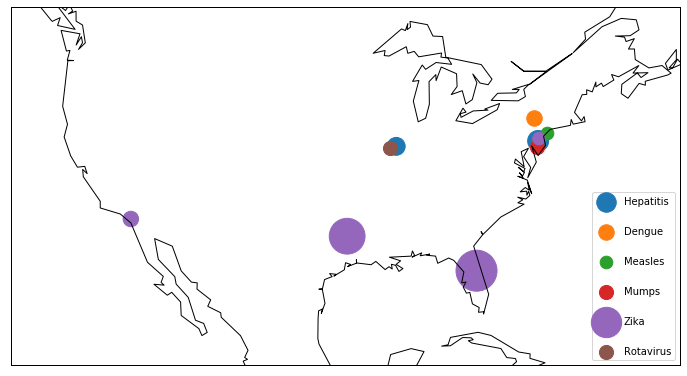

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

usa = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='c', lat_0=30.0, lon_0=-100)
#usa = Basemap()
usa.drawcoastlines()
#usa.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
usa.drawmapboundary()
#usa.shadedrelief()
for disease in disease_set:
    df_group = df_outbreaks[df_outbreaks['disease']==disease]
    usa.scatter(df_group['mean_lon'].to_list(), df_group['mean_lat'].to_list(),latlon=True, label=disease, s=df_group['disease_count']*40)
    #ax.annotate(df_group['disease_count'],df_group['mean_lon'].to_list(), df_group['mean_lat'].to_list())
plt.legend(loc='lower right', labelspacing=2)   
plt.show()

### Doing the same for the world data gives...

Number of Outliers: 68
Number of groups: 16
Number of headlines: 305


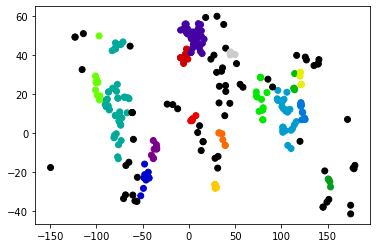

/home/chris/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,headline,city,latitude,longitude,countrycode,cluster_index
0,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR,0
1,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO,-1
2,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH,1
3,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR,2
4,San Juan reports 1st U.S. Zika-related death a...,San Juan,-31.53750,-68.53639,AR,-1
...,...,...,...,...,...,...
300,Influenza Exposure in Muscat,Muscat,23.58413,58.40778,OM,-1
301,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,31.76904,35.21633,IL,-1
302,More Zika patients reported in Indang,Indang,14.19528,120.87694,PH,3
303,Suva authorities confirmed the spread of Rotav...,Suva,-18.14161,178.44149,FJ,-1


In [23]:
visualize_clusters(500, 4, df_world)

In [24]:
aggregate = order_clusters(df_world)

In [25]:
sorter = aggregate['cluster_index'].to_list()

In [26]:
print(sorter)

[-1, 1, 5, 4, 3, 8, 2, 14, 0, 9, 12, 13, 7, 11, 10, 6, 15]


In [27]:
df_world.cluster_index = df_world.cluster_index.astype("category")
df_world.cluster_index.cat.set_categories(sorter, inplace=True)
df_world = df_world[df_world['cluster_index']!= -1 ].sort_values(['cluster_index'])
df_world

/home/chris/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,headline,city,latitude,longitude,countrycode,cluster_index
98,Will MCD vaccine help Strasbourg?,Strasbourg,48.58392,7.74553,FR,1
120,Spike of Chlamydia Cases in Berlin,Berlin,52.52437,13.41053,DE,1
212,Case of Mad Cow Disease Reported in Hilden,Hilden,51.16818,6.93093,DE,1
203,Mad Cow Disease Disastrous to Brussels,Brussels,50.85045,4.34878,BE,1
122,More Livestock in Fontainebleau are infected w...,Fontainebleau,48.40908,2.70177,FR,1
...,...,...,...,...,...,...
23,Brisbane is infested with Meningitis,Brisbane,-27.46794,153.02809,AU,6
293,Case of Swine Flu Reported in Tbilisi,Tbilisi,41.69411,44.83368,GE,15
220,The Spread of Herpes in Baku has been Confirmed,Baku,40.37767,49.89201,AZ,15
205,Authorities are Worried about the Spread of He...,Ganja,40.68278,46.36056,AZ,15


In [28]:
df_merge = pd.merge(df_world, aggregate, on='cluster_index', how='left')

In [29]:
df_world['center_distance'] = great_circle_distance([df_merge['mean_lat'],df_merge['mean_lon']], [df_merge['latitude'],df_merge['longitude']])

In [30]:
df_world = df_world.sort_values(['cluster_index', 'center_distance'], ascending=[True,True])

In [31]:
matchList = []
for hdl in df_world['headline']:
    try:
        m = re.search(disease_regex, hdl)
        matchList.append(m.group('disease'))
    except:
        matchList.append("NaN")
#print(matchList)
df_world['disease'] = matchList
df_world

,headline,city,latitude,longitude,countrycode,cluster_index,center_distance,disease
142,More Patients in Dublin are Getting Diagnosed ...,Dublin,53.33306,-6.24889,IE,1,109.602013,Bronchitis
229,Mad Cow Disease Hits London,London,51.50853,-0.12574,GB,1,127.599377,Mad Cow
165,Hepatitis D has Arrived in Grenoble,Grenoble,45.17869,5.71479,FR,1,158.484620,Hepatitis
236,Barcelona Struck by Spanish Flu,Barcelona,41.38879,2.15899,ES,1,171.022115,Flu
129,Will the Mad Cow Outbreak Reach Vienna?,Vienna,48.20849,16.37208,AT,1,181.404864,Mad Cow
...,...,...,...,...,...,...,...,...
51,Precautionary Zika measures in Rockhampton,Rockhampton,-23.38032,150.50595,AU,6,2840.733787,Zika
220,The Spread of Herpes in Baku has been Confirmed,Baku,40.37767,49.89201,AZ,15,94.933969,Herpes
205,Authorities are Worried about the Spread of He...,Ganja,40.68278,46.36056,AZ,15,533.685051,Hepatitis
166,West Nile Virus Symptoms Spread all over Yerevan,Yerevan,40.18111,44.51361,AM,15,595.224373,West Nile


In [32]:
df_outbreaks = order_diseaseByCluster(df_world)
df_outbreaks = df_outbreaks[df_outbreaks['disease']!="NaN"]
df_outbreaks = df_outbreaks.head(10).reset_index()
df_outbreaks.to_csv('data/world_summary.csv', sep=';', index=False)
df_outbreaks

,index,cluster_index,disease,disease_count,mean_lon,mean_lat
0,0,5,Zika,30,-79.182950,10.317103
1,1,4,Zika,22,105.009050,8.756301
2,2,1,Mad Cow,18,3.305627,49.970827
3,3,3,Zika,15,121.907516,12.671395
4,4,8,Zika,12,77.133543,17.674740
5,5,2,Zika,11,-46.935393,-23.275814
6,6,0,Zika,9,-37.101433,-8.605374
7,8,9,Zika,8,-99.022571,23.334604
8,9,5,Hepatitis,5,-76.613616,38.285484
9,10,1,Flu,4,5.245525,42.554363


In [33]:
disease_set = (set(df_outbreaks['disease']))

In [34]:
print(disease_set)

{'Zika', 'Hepatitis', 'Flu', 'Mad Cow'}


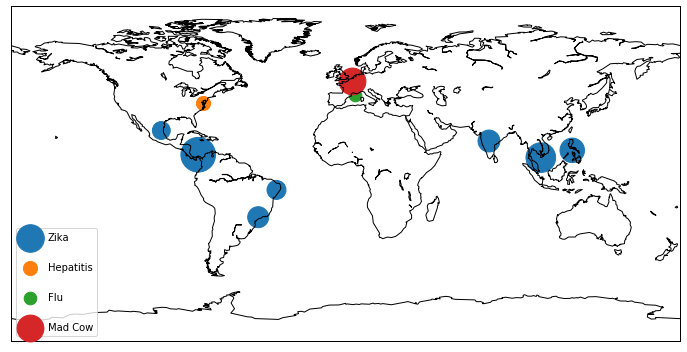

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))

world = Basemap()
#usa = Basemap()
world.drawcoastlines()
#usa.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
world.drawmapboundary()
#usa.shadedrelief()
for disease in disease_set:
    df_group = df_outbreaks[df_outbreaks['disease']==disease]
    world.scatter(df_group['mean_lon'].to_list(), df_group['mean_lat'].to_list(),latlon=True, label=disease, s=df_group['disease_count']*40)
    #ax.annotate(df_group['disease_count'],df_group['mean_lon'].to_list(), df_group['mean_lat'].to_list())
plt.legend(loc='lower left', labelspacing=2)   
plt.show()